In [83]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
news_df = pd.read_csv('../data/clean/cleaned_news_unlabeled.csv')

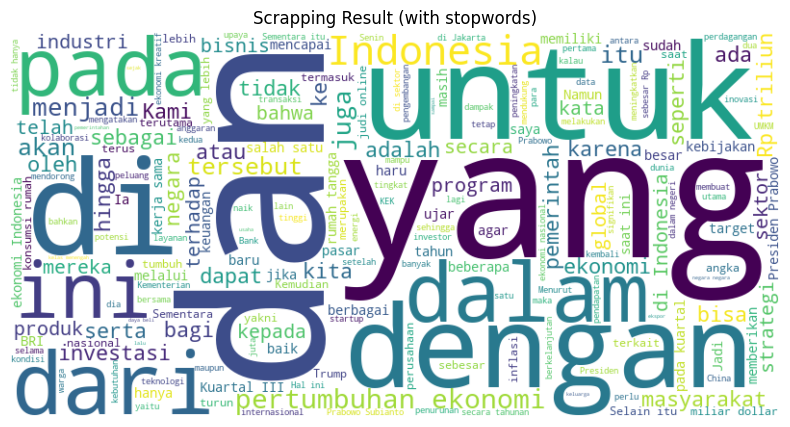

In [31]:
text = ' '.join(news_df['sentence'].astype(str))

wordcloud_with_stopwords = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_with_stopwords, interpolation='bilinear')
plt.title('Scrapping Result (with stopwords)')
plt.axis('off')
plt.show()

In [5]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [6]:
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

In [7]:
def remove_stopwords(text):
    removed_stopword = stopword_remover.remove(text)
    return removed_stopword

In [8]:
removed_stopwords_text = remove_stopwords(text)

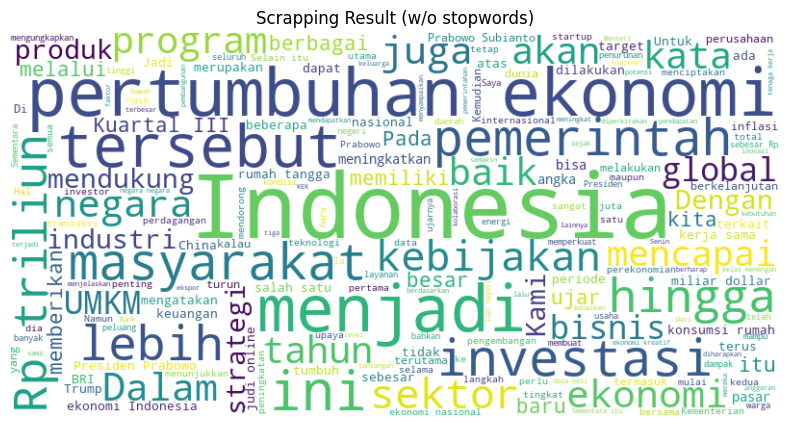

In [32]:
wordcloud_no_stopwords = WordCloud(width=800, height=400, background_color='white').generate(removed_stopwords_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_stopwords, interpolation='bilinear')
plt.title('Scrapping Result (w/o stopwords)')
plt.axis('off')
plt.show()

Text(0.5, 0.68, 'WordCloud')

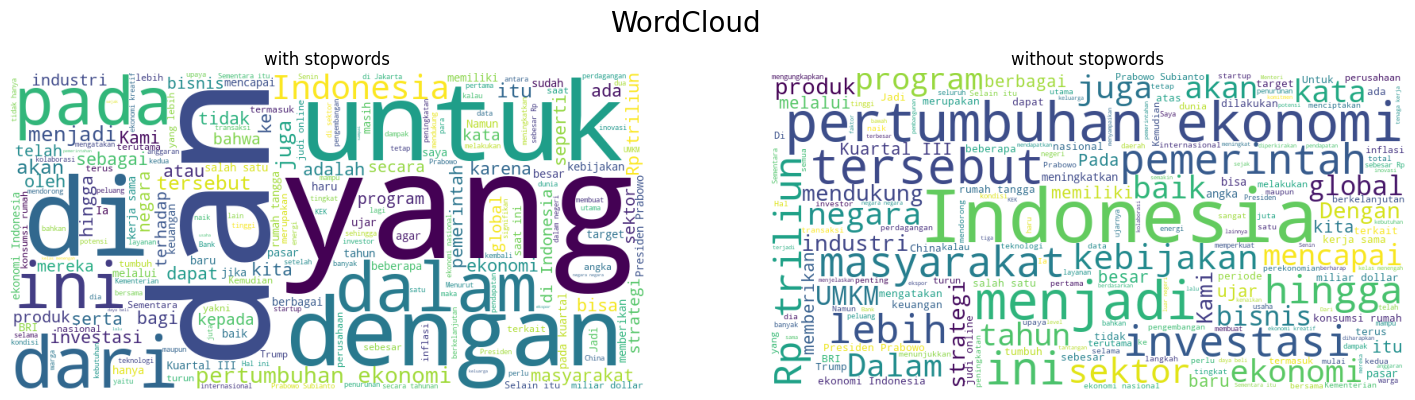

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(18,12))

ax[0].imshow(wordcloud_with_stopwords)
ax[0].set_title('with stopwords')
ax[0].axis('off')

ax[1].imshow(wordcloud_no_stopwords)
ax[1].set_title('without stopwords')
ax[1].axis('off')

plt.suptitle('WordCloud', fontsize=20, y=0.68)

C:\Users\fadhil\AppData\Local\Temp\ipykernel_140368\1893140932.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


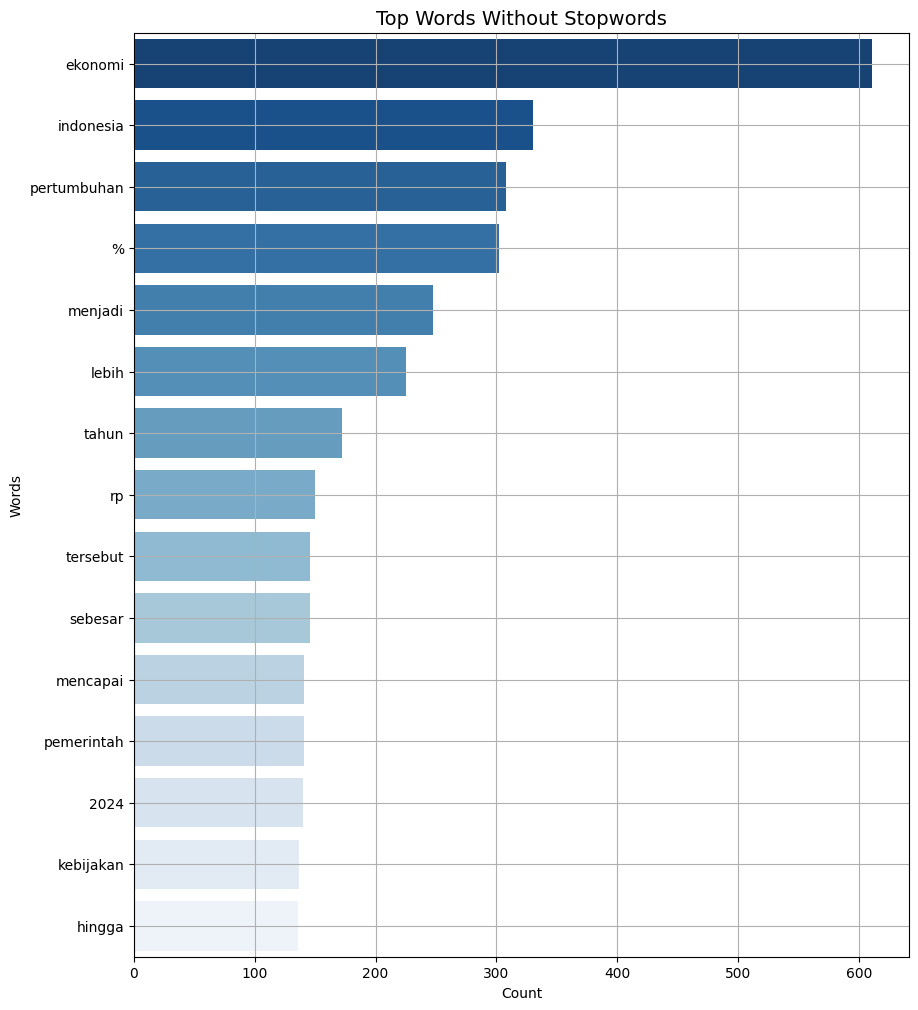

In [91]:
tokenized_no_stopwords = removed_stopwords_text.lower().split()
word_counts_no_stopwords = Counter(tokenized_no_stopwords)

most_common_words = word_counts_no_stopwords.most_common(15)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 12))
sns.barplot(
    x=list(counts),
    y=list(words),
    palette="Blues_r",
)

plt.title("Top Words Without Stopwords", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Words")
plt.grid(True)
plt.show()